<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions

Potential Questions:
1. Who is more likely to donate blood considering their blood donating history.
2. When are people more likely to donate blood?
3. Based on past donations, how much blood could be donated in the future?

## Actual Question
Choose the **one** question that should be answered.

Considering the the donors' donation information, how likely are they to be donating in March.

**Subject Matter:** Blood Transfusion Service Center Dataset

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

**Data Set Information:**

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).


**Attribute Information:**

Given is the variable name, variable type, the measurement unit and a brief description. The "Blood Transfusion Service Center" is a classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

**R (Recency - months since last donation),**

**F (Frequency - total number of donation),**

**M (Monetary - total blood donated in c.c.),**

**T (Time - months since first donation),** and

a binary variable representing **whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).**

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# read blood transfusion CSV file
raw_df = pd.read_csv('transfusion.csv')
raw_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
# number of features: 5, 1 target varible and 4 predicting variables
raw_df.shape

(748, 5)

In [4]:
# data types
raw_df.dtypes

# all numeric

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [5]:
# Describe the data, any outliers? Or any other noticable features?
raw_df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


There a Total of 748 Donors
This dataset is from the day of: 2008-10-03

[Recency] Months since last donation:

    - Average: 9 Months
    - Min: 0 months (less than 30-31 days)
    - Max: 74 months (6+ years)
    
[Frequency] Total donation visits:

    - Average: 5 times
    - Min: Once
    - Max: 50 times
    
[Monetary] Amount of Blood donated (in cc):

    - Average: 1379 cc
    - Min: 250 cc
    - Max: 125000 cc
    
The Max of Monetary (125000 cc) seems to be a lot bigger than the average (1379 cc) is it an outlier?

From the Min of Monetary (250cc) and Min of Frequency (1 visit), maybe the average blood donated per visit = 250 cc.

So Frequency times should be tied in with the amount of blood donated.

More frequency means more blood donated in total, and the Max of Frequency (50 visits) is also quite large compared to the average.

[Time] Months since first donation:

    - 34 months
    - Min: 2 months (more recent donors from August 2008)
    - Max: 98 months (around 8+ years so earliest donor was from 2000)
    
If they donated blood in March:

    - Average: 0.24 (only around 1/4 of the donors donated in March)
    
750/4 = 187.5 around 180 people out of 748 donated blood back then.

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

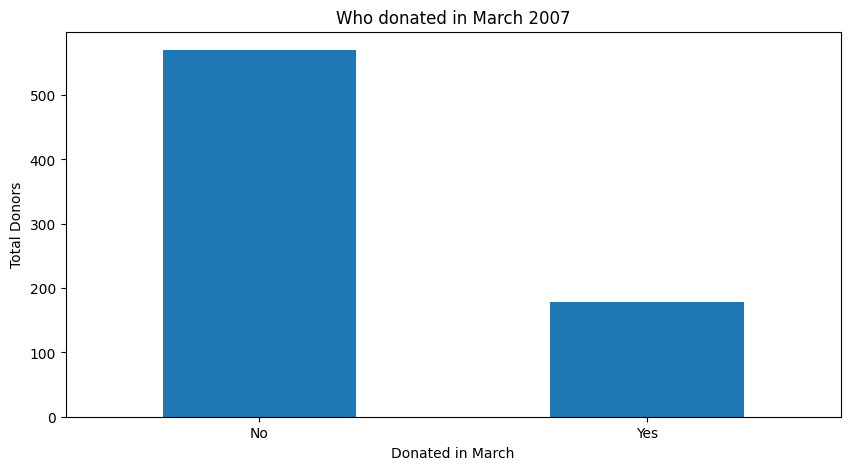

In [6]:
# Visualisation of the people who have/have not donated in March:
# size of graph
plt.figure(figsize = (10, 5))

# labels for graph
plt.xlabel('Donated in March')
plt.ylabel('Total Donors')
plt.title('Who donated in March 2007')

# plot graph with yes or no labeled
ax = raw_df['whether he/she donated blood in March 2007'].value_counts().plot.bar()
ax.set_xticklabels(['No', 'Yes'], rotation = 0)

In [7]:
# sort by monetary, which shows that the freqency is high which mean they have given blood multiple times.
raw_df.sort_values('Monetary (c.c. blood)')

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
747,72,1,250,72,0
170,2,1,250,2,0
171,2,1,250,2,0
172,2,1,250,2,0
173,2,1,250,2,0
...,...,...,...,...,...
505,2,41,10250,98,1
500,2,43,10750,86,1
503,2,44,11000,98,0
9,5,46,11500,98,1


In [8]:
# empty DF
count_df = pd.DataFrame()

# count of frequency times by groupby function
freq_df = pd.DataFrame()
freq_df['frequency'] = pd.DataFrame(raw_df.groupby(['Frequency (times)'])[['Frequency (times)']].transform('count'))

# get only the count numbers into the empty DF
count_df['frequency'] = freq_df['frequency'].sort_values().unique()

In [9]:
# count of monetary by groupby function
mone_df = pd.DataFrame()
mone_df['monetary'] = pd.DataFrame(raw_df.groupby(['Monetary (c.c. blood)'])[['Monetary (c.c. blood)']].agg(['count']))

# get only the count numbers into the empty DF
count_df['monetary'] = mone_df['monetary'].sort_values().unique()

In [10]:
# check if they have the same values
count_df

,frequency,monetary
0,1,1
1,2,2
2,3,3
3,4,4
4,6,6
5,9,9
6,13,13
7,14,14
8,22,22
9,24,24


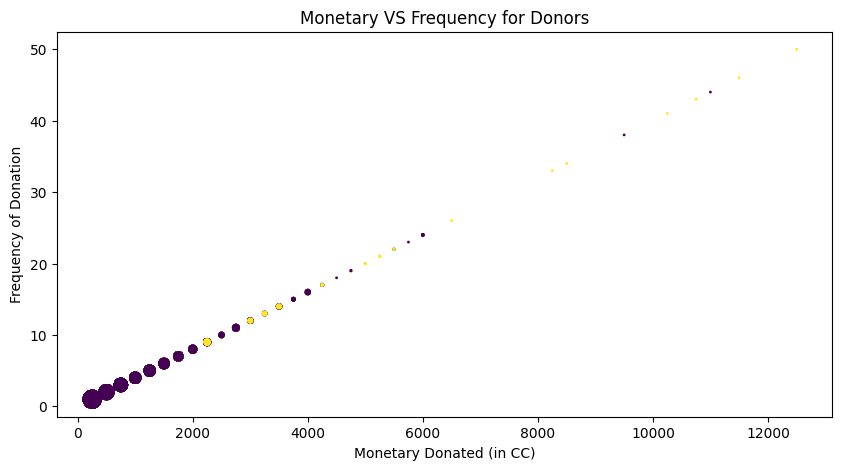

In [56]:
# Visualisation of Monetary VS Frequency:
# size of graph
plt.figure(figsize = (10, 5))

# labels for graph
plt.xlabel('Monetary Donated (in CC)')
plt.ylabel('Frequency of Donation')
plt.title('Monetary VS Frequency for Donors')

# plot graph with yes or no labeled and size by count
ax = plt.scatter(raw_df['Monetary (c.c. blood)'], raw_df['Frequency (times)'], s=freq_df, c=raw_df['whether he/she donated blood in March 2007'])

# The points are in a straight line, this means that the frequency is proportional to monetary.
# The monetary is dependent on the number of visits.
# The amount of blood donated per visit is probably set at 250cc/visit.

In [12]:
# By subtracting Recency (months) from Time (months) we can see the time (months) in which they have donated blood
raw_df['Total_Time (Months)'] = raw_df['Time (months)'] - raw_df['Recency (months)']
raw_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,Total_Time (Months)
0,2,50,12500,98,1,96
1,0,13,3250,28,1,28
2,1,16,4000,35,1,34
3,2,20,5000,45,1,43
4,1,24,6000,77,0,76


In [13]:
# by dividing the total time by frequency we can see the average time between each donation
raw_df['Average_Time_Per_Frequency (Months)'] = round(raw_df['Total_Time (Months)'] / raw_df['Frequency (times)'], 1)
raw_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,Total_Time (Months),Average_Time_Per_Frequency (Months)
0,2,50,12500,98,1,96,1.9
1,0,13,3250,28,1,28,2.2
2,1,16,4000,35,1,34,2.1
3,2,20,5000,45,1,43,2.2
4,1,24,6000,77,0,76,3.2


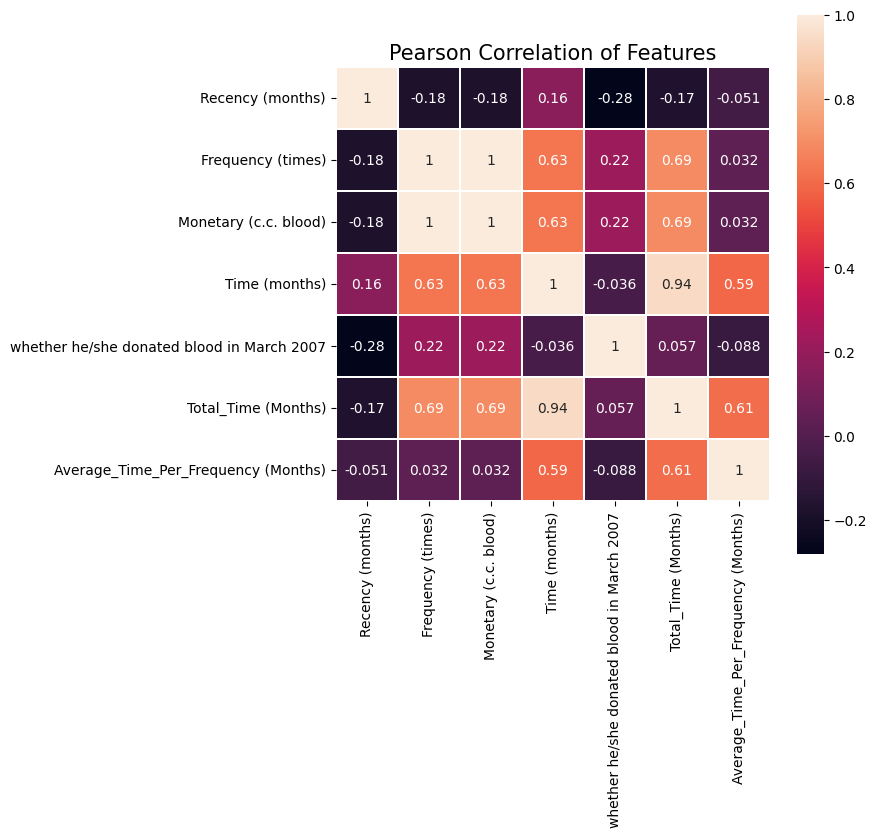

In [64]:
# correlation graph of the dataset
plt.figure(figsize = (7, 7))
plt.title('Pearson Correlation of Features', size = 15)
sns.heatmap(raw_df.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            linecolor = 'white',
            annot = True)
plt.show()

Obviously Monetary is dependent on Frequency, so they have correlation value at 1.

    - I wonder if both columns are needed for training (?)
    
If they donate frequently they are more likely to donate in general but just in March.

If they have donated a large number of times, they have obviously done this for quite a long time

    - Hence the +0.63 correlation value for frequency/monetary with time.

If they have donated just recently and it being their first donation.

Meaning that they have never visited before October 2008, since the dataset was from then.

This would mean that they would not have donated in March 2007.

    - Do I drop these data points (?)

In [15]:
# Any null or missing values? No NaN values.
raw_df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
Total_Time (Months)                           0
Average_Time_Per_Frequency (Months)           0
dtype: int64

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [31]:
# target variable
y = raw_df['whether he/she donated blood in March 2007']

# predicting variables, drop total_time as it's similar to Time (months)
X = raw_df.drop(columns=['whether he/she donated blood in March 2007', 'Total_Time (Months)'])

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
    - Recency, Frequency, Time, Monetary (might check if this column is needed)
- Is there an output variable (label)?
    - 0 (for no) and 1 (for yes) for whether or not they donated in March 2007
- If there is an output variable:
    - What is it?
        - It is a binary for if they have donated blood in March 2007
    - What is its type?
        - It is a binary variable.
- What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [17]:
# It is a supervised classification (binary) problem.

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [32]:
# test train split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check shapes
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

#check the mean of test and train
print(f"Train Probablity of Response: {y_train.mean()}")
print(f"Test Probablity of Response: {y_test.mean()}")

X_train: (598, 5)
y_train: (598,)
X_test: (150, 5)
y_test: (150,)
Train Probablity of Response: 0.23578595317725753
Test Probablity of Response: 0.24666666666666667


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [65]:
# different params for Decision Tree
params  = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 3, 4]
}

In [66]:
# using decision tree classifier as model
clf = DecisionTreeClassifier(random_state=42)

# using grid search cv with params
gs_dt = GridSearchCV(clf,
                     param_grid=params,
                     scoring='accuracy',
                     cv = 10
                    )

In [67]:
# fit X and y into Decision Tree Classifier model
gs_dt.fit(X_train, y_train)

# getting best params
print(gs_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}


In [46]:
# Decision Tree model with Best Params
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=None, min_samples_split=2, splitter='best', random_state=42)

# Step 9: Fit the Model

In [68]:
# fit model with training set
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

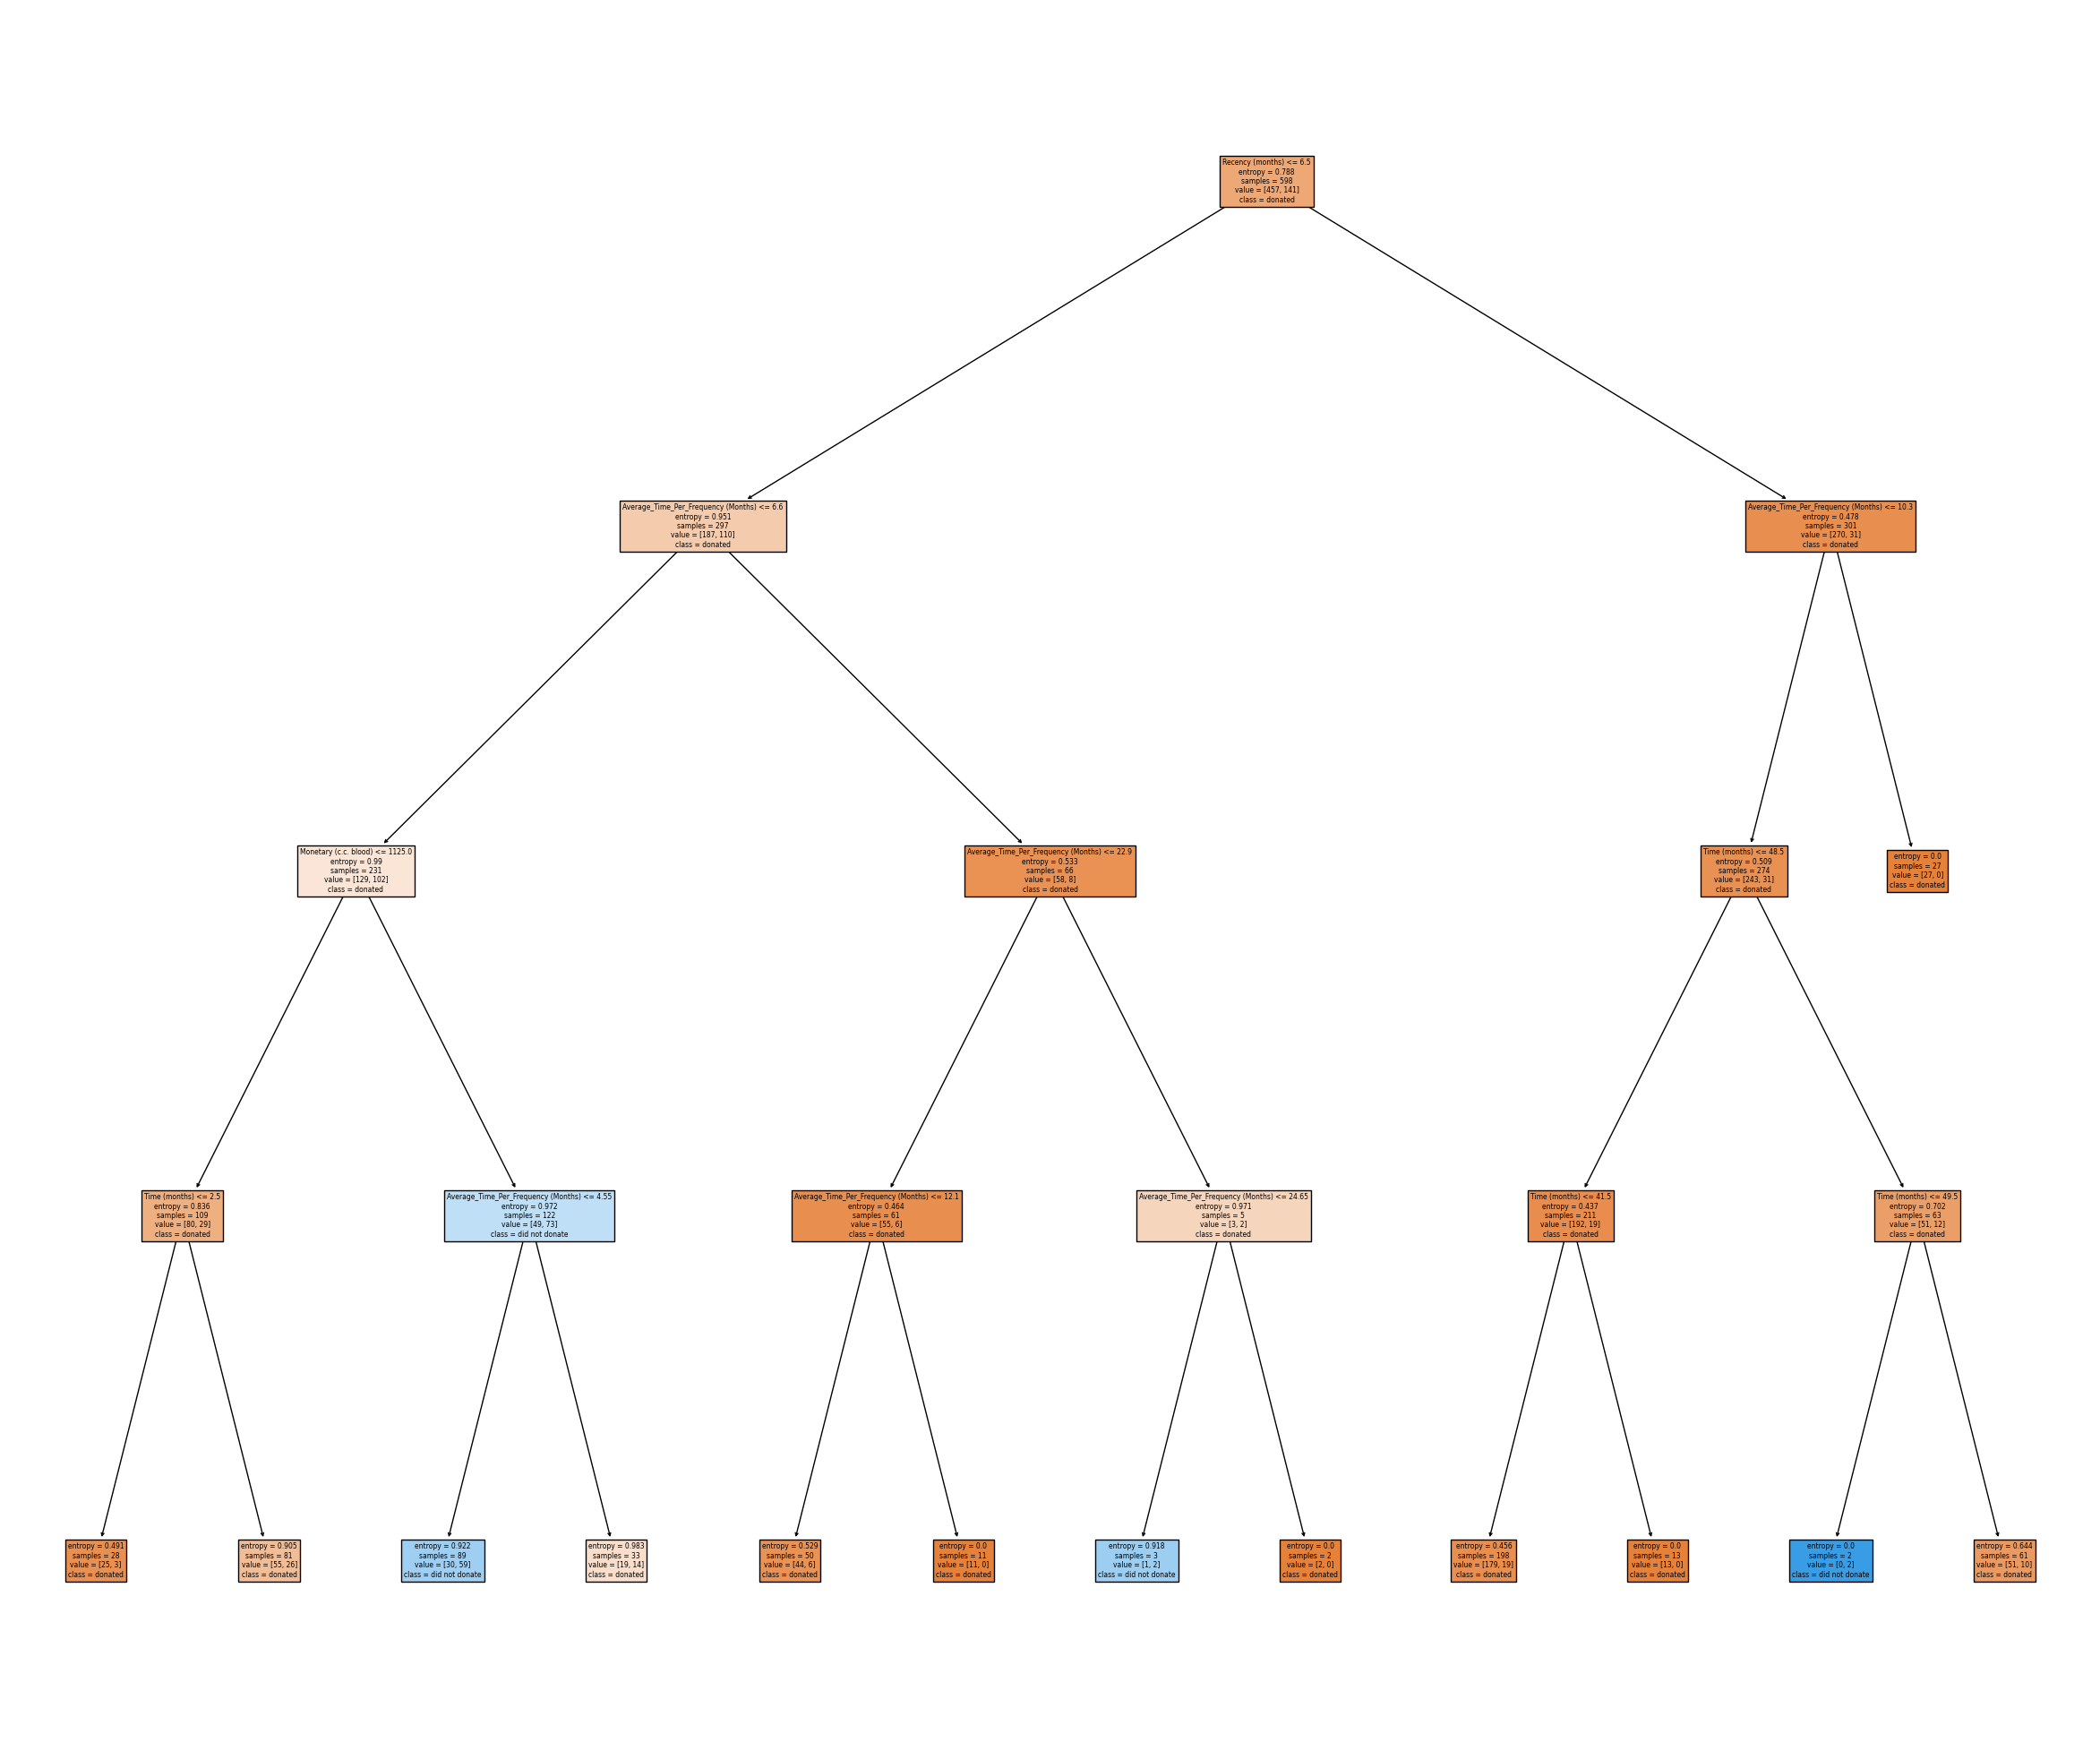

In [69]:
fig, axes = plt.subplots(1, 1, figsize=(30,25))

_ = tree.plot_tree(model, 
               feature_names=X_train.columns, 
               filled=True, 
               class_names=['donated', 'did not donate'],
               ax=axes
          )

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [70]:
# predict the using train set data
y_train_pred = model.predict(X_train)

# finding the scores between y_train and y_predicted
print(f"Accuracy: {metrics.accuracy_score(y_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(y_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_train, y_train_pred)}")

# recall is not great as the dataset is a bit imbalanced

Accuracy: 0.82
Precision Score: 0.67
Recall Score: 0.45
Confusion Matrix: [[426  31]
 [ 78  63]]


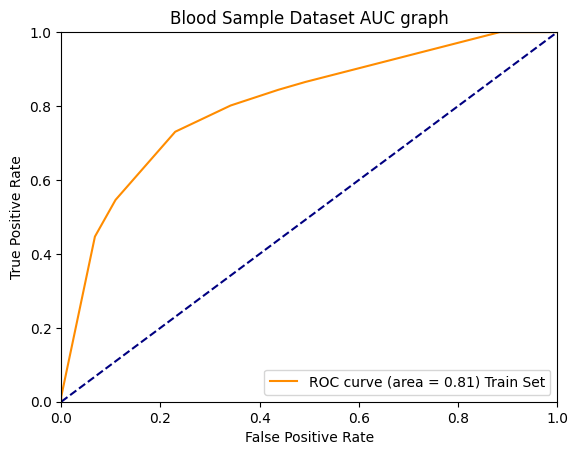

In [71]:
# predict probability
y_train_prob = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_prob)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',  label = 'ROC curve (area = %0.2f) Train Set' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Blood Sample Dataset AUC graph')
plt.legend(loc = "lower right")
plt.show()

# AUC graph shows an 0.81 area

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [72]:
# predict the test set
y_test_pred = model.predict(X_test)

# finding the scores between y_train and y_predicted
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# recall score is quite low

Accuracy: 0.79
Precision Score: 0.64
Recall Score: 0.38
Confusion Matrix: [[105   8]
 [ 23  14]]


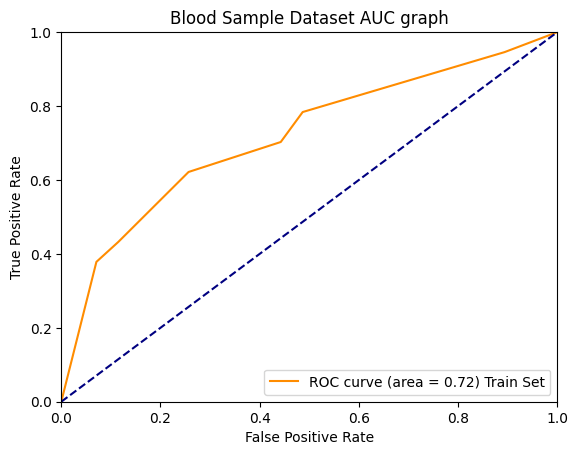

In [73]:
# predict probability
y_test_prob = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_prob)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',  label = 'ROC curve (area = %0.2f) Train Set' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Blood Sample Dataset AUC graph')
plt.legend(loc = "lower right")
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [29]:
# The model can make predictions when new data is input to determine how likely they are to donate blood in the future.
# There is likely a goal for donating blood and this will help to check if we are able to meet the goal.
# It can also help to target donors that are more likely to donate.



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



